# CNA Homework

## Part 1

**Reddit Networks**

Using the [Reddit networks dataset],(http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite TV show. Using the data of the selected subreddit, answer the following questions:

In [1]:
!wget http://dynamics.cs.washington.edu/nobackup/reddit/rupaulsdragrace.tar.gz

--2020-01-31 20:49:39--  http://dynamics.cs.washington.edu/nobackup/reddit/rupaulsdragrace.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180442979 (172M) [application/x-gzip]
Saving to: ‘rupaulsdragrace.tar.gz’

rupaulsdragrace.tar 100%[===================>] 172.08M  22.2MB/s    in 8.8s    

2020-01-31 20:49:48 (19.6 MB/s) - ‘rupaulsdragrace.tar.gz’ saved [180442979/180442979]



In [2]:
import tarfile
import os
import turicreate as tc 
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
fname = 'rupaulsdragrace.tar.gz'

if (fname.endswith("tar.gz")):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall(path="./data/")
    tar.close()

In [3]:
def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g

g = tc.SGraph()
graphs_dir = 'data'
sframes_paths = [graphs_dir +'/' + s for s in os.listdir(graphs_dir)]
for folder in sframes_paths:
    if not folder.endswith(".sgraph"):
        continue
    subG = tc.load_sgraph(folder)
    g = g.add_vertices(subG.get_vertices())
    g = g.add_edges(subG.get_edges())

In [4]:
ng = sgraph2nxgraph(g)
print("Networkx: %s" % nx.info(ng))

Networkx: Name: 
Type: DiGraph
Number of nodes: 32787
Number of edges: 827322
Average in degree:  25.2332
Average out degree:  25.2332


In [5]:
from networkx.algorithms.components import *
from networkx.algorithms.centrality import *
from scipy.stats import spearmanr 
from networkx.generators.geometric import random_geometric_graph
from networkx.algorithms.community import * 
import collections
import matplotlib.pyplot as plt
import seaborn as sns

*Task 1*: Calculate and visualize the degree distribution of the vertices in the network

In [85]:
degree_sequence = sorted(ng.degree(), key=lambda x: x[1], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter([d[1] for d in degree_sequence])
deg, cnt = zip(*degreeCount.items())

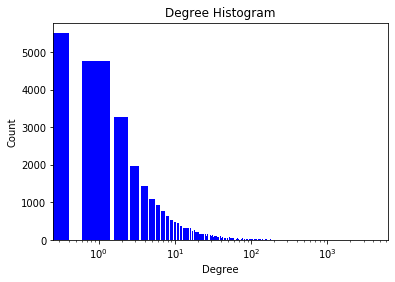

In [90]:
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale('log')
plt.show();

To confirm that the degree distribution is a power-law distribution, we plot it again on a log-log scale

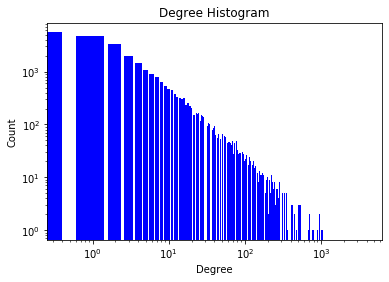

In [9]:
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale('log')
plt.yscale('log')
plt.show();

*Task 2*: Create a subgraph of the top-20 users according to the PageRank algorithm. Draw the subgraph.

In [10]:
pr = nx.pagerank(ng)

In [11]:
top_20 = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:20]
top_20_nodes = [node[0] for node in top_20]
subgraph = ng.subgraph(top_20_nodes)

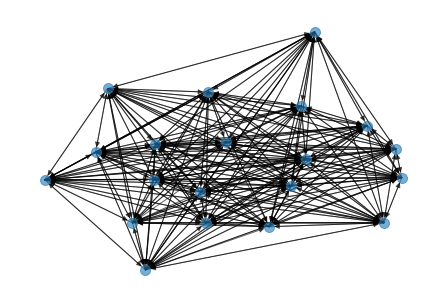

In [12]:
nx.draw_kamada_kawai(subgraph, node_size=100, alpha=0.6, figsize=(15,15))

*Task 3*: Visualize the distribution of the network's strongly and weakly connected components.

In [13]:
strong = [len(c) for c in sorted(strongly_connected_components(ng), key=len, reverse=True)]
weak = [len(c) for c in sorted(weakly_connected_components(ng), key=len, reverse=True)]

In [14]:
strongCounts = collections.Counter(strong)
weakCounts = collections.Counter(weak)

In [15]:
s_deg, s_cnt = zip(*strongCounts.items())
w_deg, w_cnt = zip(*weakCounts.items())

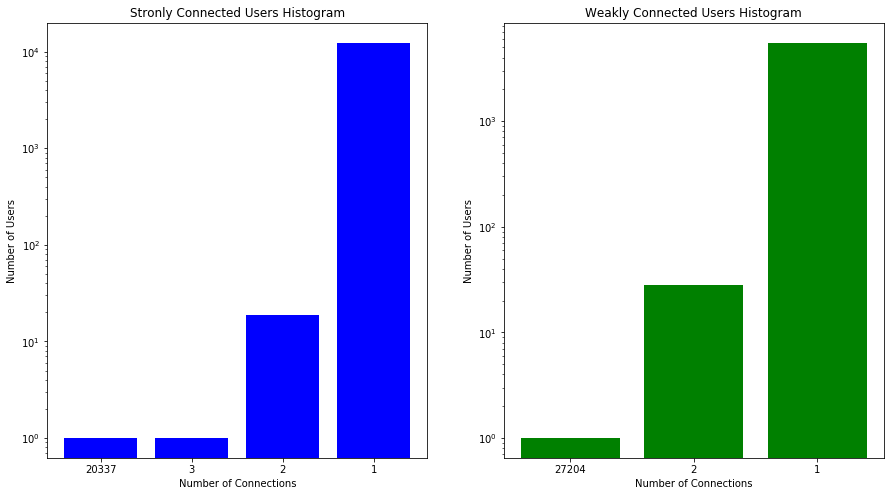

In [16]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.bar([str(s) for s in s_deg], s_cnt, color='b')
plt.title("Stronly Connected Users Histogram")
plt.ylabel("Number of Users")
plt.xlabel("Number of Connections")
plt.yscale('log')
ax2 = fig.add_subplot(1,2,2)
ax2.bar([str(s) for s in w_deg], w_cnt, color='g')
plt.title("Weakly Connected Users Histogram")
plt.ylabel("Number of Users")
plt.xlabel("Number of Connections")
plt.yscale('log')
plt.show();

*Task 4*: Split the network into communities, and find the second most central vertex in each community.

In [57]:
def find_2nd_central_node(graph):
    results = []
    print("-"*100)
    print(nx.info(graph))
    d = nx.degree_centrality(graph)
    second = sorted(dict(d).items(), key=lambda x: x[1], reverse=True)[1]
    print(f"The 2nd most central node according to Degree Centrality is {second[0]}\n",
          f"Degree Centrality {second[1]}")
    results.append(second)
    
    d = nx.pagerank(graph)
    second = sorted(dict(d).items(), key=lambda x: x[1], reverse=True)[1]
    print(f"The 2nd most central node according to PageRank is {second[0]}\n",
          f"PageRank {second[1]}")
#     d = nx.closeness_centrality(graph)
#     second = sorted(dict(d).items(), key=lambda x: x[1], reverse=True)[1]
#     print(f"The most centcentral node according to Closeness Centrality is {second}")
    results.append(second)
    return results

In [58]:
for subset in cc:
    seconds = []
    g = ng.subgraph(subset)
    if len(g.nodes) > 1:
        seconds.append(find_2nd_central_node(g))

----------------------------------------------------------------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 18626
Number of edges: 555094
Average in degree:  29.8021
Average out degree:  29.8021
The 2nd most central node according to Degree Centrality is dsaitken
 Degree Centrality 0.1814765100671141
The 2nd most central node according to PageRank is saintrorem
 PageRank 0.004550450662443864
----------------------------------------------------------------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 7820
Number of edges: 112177
Average in degree:  14.3449
Average out degree:  14.3449
The 2nd most central node according to Degree Centrality is gardenofcucumbers
 Degree Centrality 0.21498912904463488
The 2nd most central node according to PageRank is Unnie55
 PageRank 0.012989140604763558
----------------------------------------------------------------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 43


 Degree Centrality 1.0
The 2nd most central node according to PageRank is stahpcallingmesatan
 PageRank 0.35087736193586194
----------------------------------------------------------------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000
The 2nd most central node according to Degree Centrality is a__forest
 Degree Centrality 1.0
The 2nd most central node according to PageRank is a__forest
 PageRank 0.35087736193586194
----------------------------------------------------------------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000
The 2nd most central node according to Degree Centrality is joepassmore
 Degree Centrality 1.0
The 2nd most central node according to PageRank is joepassmore
 PageRank 0.35087736193586194
----------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000
The 2nd most central node according to Degree Centrality is itakehappypills
 Degree Centrality 1.0
The 2nd most central node according to PageRank is itakehappypills
 PageRank 0.35087736193586194
----------------------------------------------------------------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 2
Average in degree:   1.0000
Average out degree:   1.0000
The 2nd most central node according to Degree Centrality is Vegasbetty
 Degree Centrality 1.0
The 2nd most central node according to PageRank is Vegasbetty
 PageRank 0.07500000000000001
----------------------------------------------------------------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5

## Part 2

### Lets generate some networks

Every network contains four sets of nodes. $a\in \{0.1,0.01\}$ is the probability for an edge between two nodes in the same set. $b\in \{0.1,0.01\}$ is the probability for an edge between two nodes in different communities.

In [59]:
blocks = [100,100,100,100]
probs = [
        [[a,b,b,b],
         [b,a,b,b],
         [b,b,a,b],
         [b,b,b,a]]
    for a,b in [(0.01,0.01),(0.1,0.01),(0.01,0.1)]
    ]

In [60]:
nets = [nx.generators.community.stochastic_block_model(blocks,p) for p in probs*100]
print("There are {} networks in total.".format(len(nets)))

There are 300 networks in total.


### Node centrality 
Your code is here: replace [] accordingly to the comment in the row



In [61]:
centralities =  [ {
                    'degree':list(degree_centrality(G).values()), #replace [] with a sequence of node degree centralities 
                    'closeness':list(closeness_centrality(G).values()), #replace [] with a sequence of node closeness centralities  
                    'betweenness': list(betweenness_centrality(G).values()) #replace [] with a sequence of node betweenness centralities
                  } 
                for G in nets
                ]

In [62]:
#here we compute the corralations between the three centrality measures for each network
#every network is characterized by the tripplet of centrality correlations
centrality_correlations = [
    (
        spearmanr(c['degree'],c['closeness'])[0],
        spearmanr(c['degree'],c['betweenness'])[0],
        spearmanr(c['betweenness'],c['closeness'])[0],
    )
    for c in centralities
]

### Build a meta-network

where networks are nodes connected by an edge if their centrality correlations are similar 

In [63]:
radius = 0.025
G = random_geometric_graph(n=len(nets), radius=radius, dim=3, pos=dict(enumerate(centrality_correlations)))

In [65]:
print("number of nodes in G is the same as the number of networks in nets:{}".format(G.number_of_nodes()))
print("number of edges in G is: {}".format(G.number_of_edges()))

number of nodes in G is the same as the number of networks in nets:300
number of edges in G is: 11209


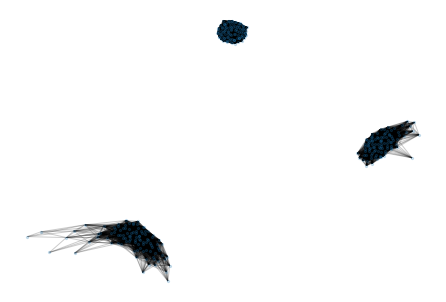

In [66]:
pos = nx.spring_layout(G)
nx.draw(G, pos=pos,node_size=5,alpha=0.2)

### Communities

#### What is the number of communities in nets[1]?

Number of communities is 4


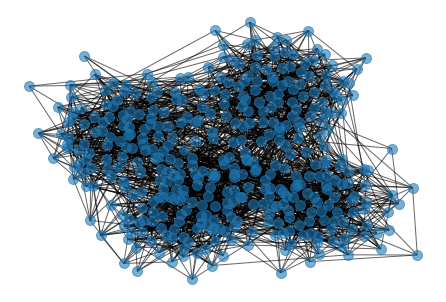

In [72]:
nets1 = greedy_modularity_communities(nets[1])
print(f'Number of communities is {len(nets1)}')
nx.draw(nets[1],node_size=100, alpha=0.6, figsize=(15,15))

#### How could you know it without running community detection?

Since we're looking at the network generated by the probability configuration (0.1,0.01), meaning we're looking at sets of nodes with a much higher probability of an edge within the community than to nodes outside of the community. This should lead to 4 distinct communities.

#### What is the number of communities in the meta-network G?

Number of communities is 3


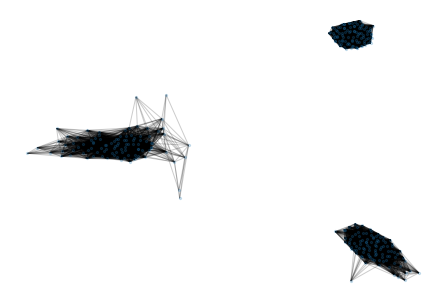

In [75]:
g_comms = greedy_modularity_communities(G)
print(f'Number of communities is {len(g_comms)}')
pos = nx.spring_layout(G)
nx.draw(G, pos=pos,node_size=5,alpha=0.2)

#### Explain why is there this number of communities in G? 

Because the meta network consists of nodes that represent networks, and they're connected if the networks' centrality correlations are similar. Since we generated networks using three distinct probability configurations for inter- and intra-community connections and then placed them in the 3-dimensional unit cube according to the similarity of their closeness, betweeness and centrality metrics, there should be 3 clusters of similar nodes. Whether two nodes are connected by an edge depends on the given distance threshold that was selected when creating the meta-network. If we were to increase the radius variable we'd get edges connecting the three main communities, and if we reduce it we'd get more sparsely connected communities and lone nodes, as seen below

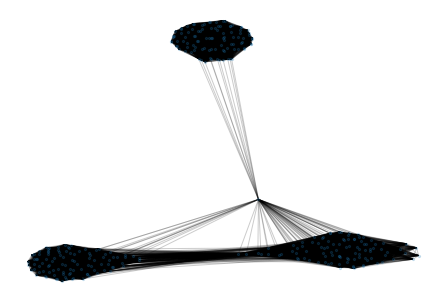

In [80]:
radius = 0.05
G2 = random_geometric_graph(n=len(nets), radius=radius, dim=3, pos=dict(enumerate(centrality_correlations)))
pos = nx.spring_layout(G2)
nx.draw(G2, pos=pos,node_size=5,alpha=0.2)

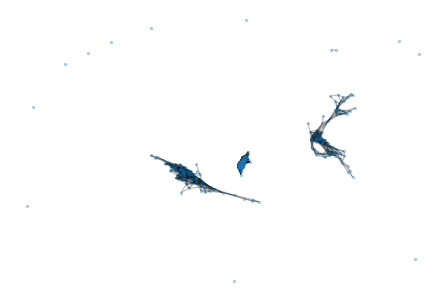

In [91]:
radius = 0.01
G3 = random_geometric_graph(n=len(nets), radius=radius, dim=3, pos=dict(enumerate(centrality_correlations)))
pos = nx.spring_layout(G3)
nx.draw(G3, pos=pos,node_size=5,alpha=0.3)